In [1]:
import pandas as pd
df = pd.read_csv("bank-full.csv",encoding="utf-8",sep =";")

In [2]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
# 二分類欄位的處理

binary_col=["default","housing","loan","y"]
for col in binary_col:
    df[col]=df[col].apply(lambda x: 1 if x =='yes' else 0)

In [4]:
'''資料分析'''

'資料分析'

In [5]:
# 資料中沒有na
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
#y的數量
df.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [7]:
# job的數量
import seaborn as sns
sns.countplot(y='job', data=df)

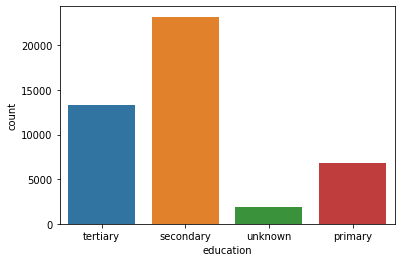

In [8]:
# education的數量
import seaborn as sns
sns.countplot(x='education', data=df)

In [9]:
# 取出某欄位的每個類別值，算出命中率
# train_df 填入要計算的表格
train_df=df
# col 填入要計算的欄位
col="job"

col_count=train_df[col].value_counts()
per_cate=[]
# 取出每個類別值，算出命中率
for i in col_count.index:
    find=train_df[train_df[col]==i]
    true=find[find.y == 1]
    per=len(true)/len(find)
    per_cate.append(per)
    
percent="percent_"+col
test = pd.DataFrame(columns=[col, percent])
test[col]=col_count.index
test[percent]=per_cate
test["count"]=col_count.values
test=test.sort_values(by=percent)
test

,job,percent_job,count
0,blue-collar,0.072750,9732
7,entrepreneur,0.082717,1487
9,housemaid,0.087903,1240
4,services,0.088830,4154
2,technician,0.110570,7597
11,unknown,0.118056,288
6,self-employed,0.118429,1579
3,admin.,0.122027,5171
1,management,0.137556,9458
8,unemployed,0.155027,1303


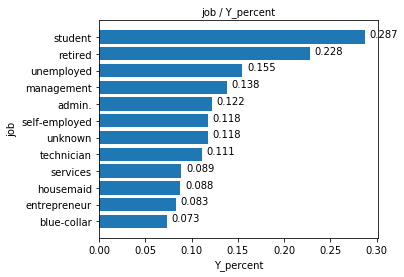

In [10]:
#長條圖 (跟上面一段共享變數)
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))

# test=test.sort_values(by=col)

x_list=test[col]
y_list=test[percent].apply(lambda x : round(x,3))


p1 = plt.barh(x_list,y_list)

for x,y in enumerate(y_list):
    plt.text(y+0.005,x,'%s' %y)

plt.ylabel(col,fontsize=10)
plt.xlabel('Y_percent',fontsize=10)
plt.title(col+" / "+'Y_percent',fontsize=10)
plt.show()

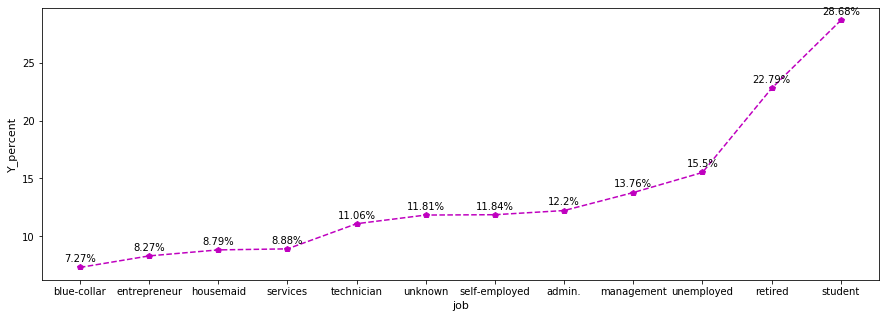

In [11]:
#線性圖 (跟上面一段共享變數)

import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# test=test.sort_values(by=col)

x_list=test[col]
y_list_all=test[percent].apply(lambda x : round(x*100, 2) )

plt.ylabel('Y_percent',fontsize=11)
plt.xlabel(col,fontsize=11)
# plt.title(col+' distribution',fontsize=15)
for x,y in enumerate(y_list_all):
    plt.text(x,y+0.5,'%s%s' %(y,"%"),ha='center')

plt.plot(x_list,y_list_all, "p--m")

plt.show()

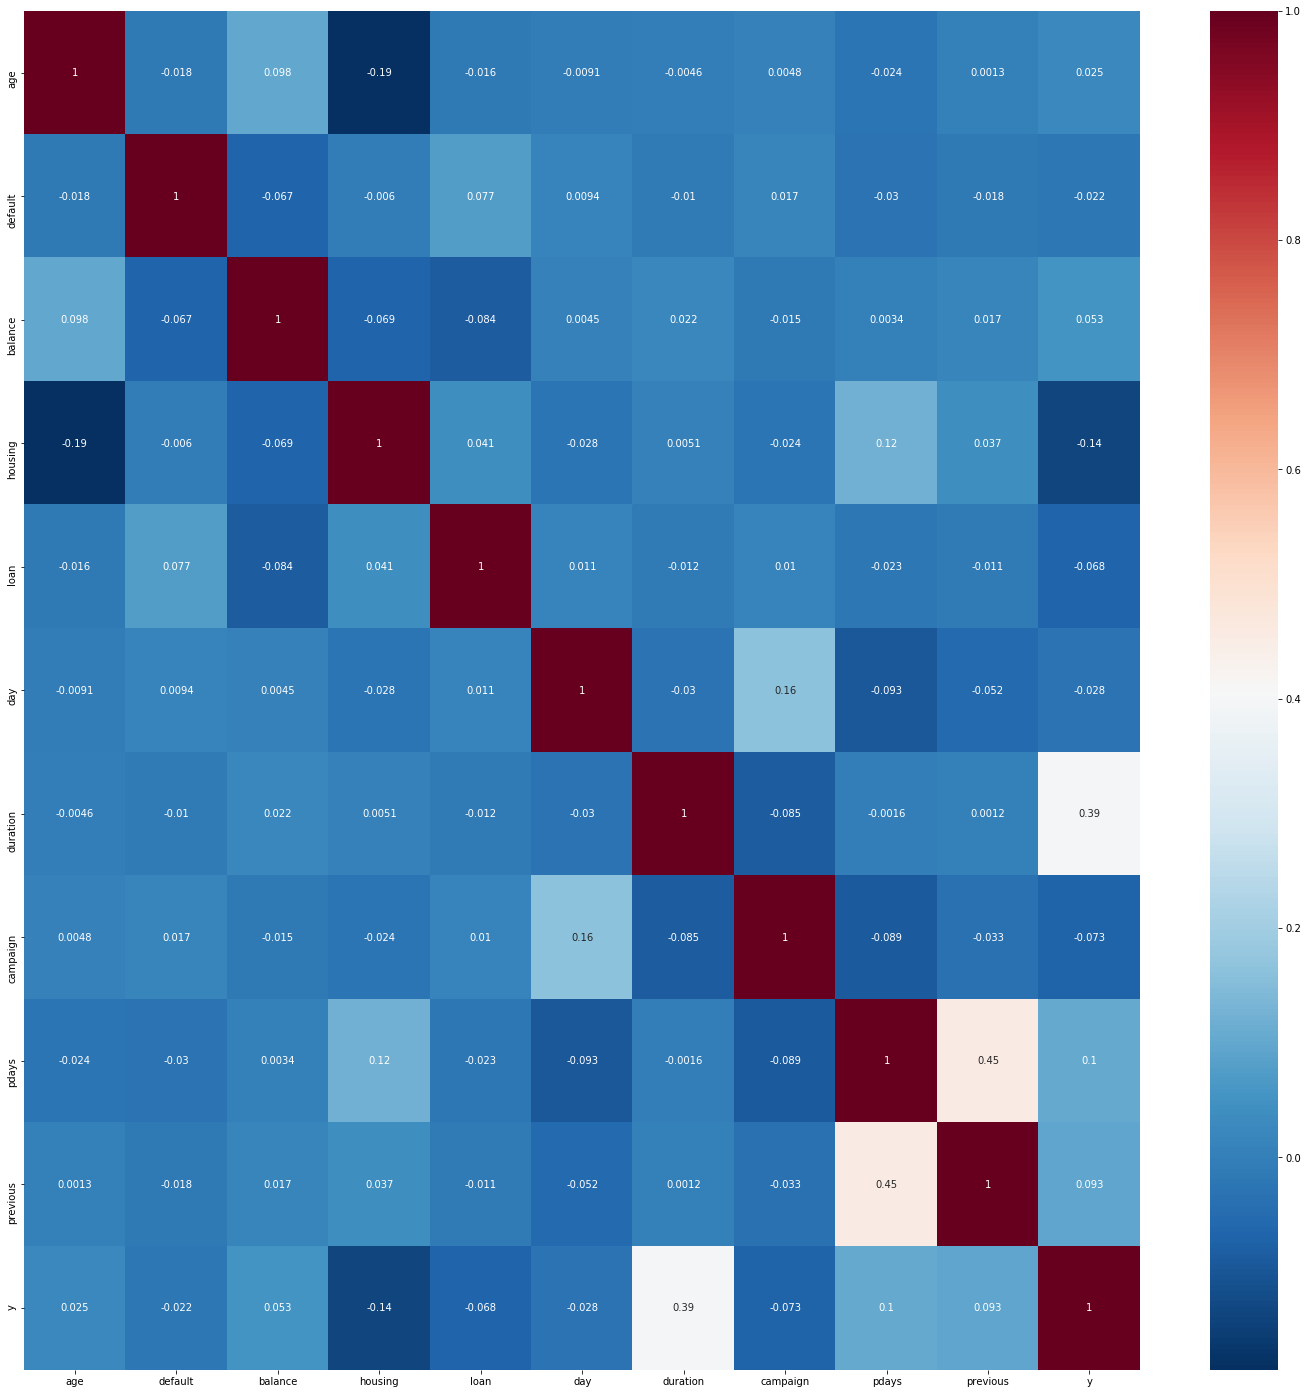

In [12]:
# 處理前的皮爾遜相關係數
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, cmap="RdBu_r")

In [13]:
# 四分位，for極值處理
import numpy as np
Percentile = np.percentile(df["balance"],[0,25,50,75,100])
IQR = Percentile[3] - Percentile[1]
UpLimit = Percentile[3]+IQR*1.5
DownLimit = Percentile[1]-IQR*1.5
print(DownLimit)
print(UpLimit)

-1962.0
3462.0


In [14]:
'''欄位處理'''

'欄位處理'

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
# age 按照工作類型熟練成4個類別，ont hot

def agesplit(s):    
    if s in range(0,31):
        return "young_age"
    if s in range(31,61):
        return "middle_age"
    if s >= 61:
        return "old_age"


n =df["age"].apply(agesplit)
dummy = pd.get_dummies(n)
df = pd.concat([df, dummy], axis=1)

In [17]:
# job 按照工作類型熟練成4個類別，ont hot

def jobsplit(s):
    # 勞動力(藍領階級)
    blue_collar = ["blue-collar","services","housemaid"]
    # 管理階層
    white_collar = ["management","admin.","technician"]
    # 創業家
    self_employed = ["entrepreneur","self-employed"]
    # 無工作
    unemployed= ["retired","unemployed","student"]
    
    if s in blue_collar:
        return "blue_collar"
    if s in white_collar:
        return "white_collar"
    if s in self_employed:
        return "self_employed"
    if s in unemployed:
        return "unemployed"
    else:
        return "X"
n = df["job"].apply(jobsplit)
dummy = pd.get_dummies(n)
df = pd.concat([df, dummy], axis=1)
df = df.drop(columns="X")

In [18]:
# marital 婚姻狀況 ont hot
n = df["marital"]
dummy = pd.get_dummies(n)
df = pd.concat([df, dummy], axis=1)

In [19]:
# education mean encording 排名，unknown放在中位數
def edu_value(s):
    if s == "primary":
        return 1
    if s == "secondary":
        return 2
    if s == "tertiary":
        return 3
    if s == "unknown":
        return 2
df["edu_value"]=df.education.apply(edu_value)

In [20]:
#  balance處理離群值 四分位數 IQR*1.5

def balance_cut(s):
    if s <(-1962):
        return(-1962)
    if s > 3462:
        return 3462
    else:
        return s

df["balance_new"]=df["balance"].apply(balance_cut)

In [21]:
# contact 通訊类型 dummy 只留手機
n = df["contact"]
dummy = pd.get_dummies(n)
df = pd.concat([df, dummy], axis=1)
df = df.drop(columns="unknown")
df = df.drop(columns="telephone")

In [22]:
# campaign 在此廣告期間此客戶的總聯繫數量，故需要減 1
# 用四分位數去離群值

campaign=df.campaign.apply(lambda x : x-1)
campaign=campaign.apply(lambda x : 6 if x > 5 else x)
df["campaign_new"]=campaign

In [23]:
# pdays 四分位 one hot 去掉-1
# df[df.pdays!=(-1)].pdays.describe()
# 25%       133.000000
# 50%       194.000000
# 75%       327.000000

def pdayssplit(s):    
    if s in range(0,133):
        return "pdays_IQR_1"
    if s in range(133,194):
        return "pdays_IQR_2"
    if s in range(194,327):
        return "pdays_IQR_3"
    if s >= 327:
        return "pdays_IQR_4"
    if s == -1:
        return "uncontacted"

n = df["pdays"].apply(pdayssplit)
dummy = pd.get_dummies(n)
df = pd.concat([df, dummy], axis=1)

In [24]:
# 四分位，for極值處理 previous 
import numpy as np
Percentile = np.percentile(df[df["previous"]!= 0]["previous"],[0,25,50,75,100])
IQR = Percentile[3] - Percentile[1]
UpLimit = Percentile[3]+IQR*1.5
DownLimit = Percentile[1]-IQR*1.5
print(DownLimit)
print(UpLimit)

-3.5
8.5


In [25]:
# previous   處理離群值 四分位數 IQR*1.5

df["previous_new"]=df["previous"].apply(lambda x : 9 if x > 8 else x)

In [26]:
# poutcome 只取 success，忽略失敗跟other
df["poutcome_success"]=df["poutcome"].apply(lambda x : 1 if x =="success" else 0)

In [27]:
'''新增欄位'''

'新增欄位'

In [28]:
# 把 housing跟loan相加成新的負債欄位
personal_info=df[['housing','loan']]
df["loan_sum"] = personal_info[personal_info==1].count(axis=1)

In [29]:
#unknown的處理， 計算每行的unknown是多少（base on個人資料）
personal_info=df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan',"contact"]]
df["unknown_sum"] = personal_info[personal_info=="unknown"].count(axis=1)

d:\python\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [30]:
'''模型前預處理'''

'模型前預處理'

In [31]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'middle_age', 'old_age', 'young_age',
       'blue_collar', 'self_employed', 'unemployed', 'white_collar',
       'divorced', 'married', 'single', 'edu_value', 'balance_new', 'cellular',
       'campaign_new', 'pdays_IQR_1', 'pdays_IQR_2', 'pdays_IQR_3',
       'pdays_IQR_4', 'uncontacted', 'previous_new', 'poutcome_success',
       'loan_sum', 'unknown_sum'],
      dtype='object')

In [32]:
df=df.drop(columns=['age', 'job', 'marital', 'education','balance', 'housing'
                    ,'loan','contact', 'day', 'month', 'duration', 'campaign'
                    , 'pdays','previous', 'poutcome'])

In [33]:
#分成 train test
from sklearn.model_selection import train_test_split
x=df.drop(columns=['y'])
y=df["y"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [34]:
# # 數據標準化
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [35]:
len(df.columns)

25

In [36]:
'''lightgbm'''

'lightgbm'

In [41]:
import lightgbm as lgb
from sklearn.metrics import * 
dtrain = lgb.Dataset(x_train, y_train, free_raw_data = False)
dvalid = lgb.Dataset(x_test, y_test, free_raw_data = False, reference=dtrain )

In [120]:
from sklearn.model_selection import GridSearchCV

tuned_parameter = [{"criterion":["gbdt","dart"],
                    'max_depth':range(10,20,1),
                    'min_data_in_leaf': range(10,50,10),
                    'num_leaves' : range(10,50,10)
                    
                  }]


estimator=lgb.LGBMClassifier(
                            num_boost_round=15,
                            objective='binary',
                            metric='auc',
                            is_unbalance = 'true'
               )

#設置交叉驗證
clf = GridSearchCV(estimator , param_grid=tuned_parameter , cv=5, n_jobs=-1)
clf.fit(x_train, y_train)

print('Best parameters:')
print(clf.best_params_)

Best parameters:
{'criterion': 'gbdt', 'max_depth': 10, 'min_data_in_leaf': 40, 'num_leaves': 10}


d:\python\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [42]:
#看f1_score 評分
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    labels=pd.Series(labels)
    preds=pd.Series(preds).apply(lambda x : 1 if x>0.5 else 0)
    f_score = f1_score(labels , preds)
    return 'f1_score', f_score, True

In [161]:
params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,      
        'max_depth': 10,          
        'min_data_in_leaf': 40,      
        'num_leaves' : 50,         # 經過人工微調後，發現50更準
        'verbose': 1,
        'is_unbalance': 'true',
}

In [163]:
evals_result = {}
gbm = lgb.train(params, 
                      dtrain, 
                      num_boost_round=12,       # 先設定20，再根據出來的值選出最佳
                      valid_sets=[dtrain,dvalid],
                      valid_names=['train', 'eval'],
                      feval = evalerror,
                      evals_result = evals_result
               )

[1]	train's auc: 0.765746	train's f1_score: 0	eval's auc: 0.743809	eval's f1_score: 0
[2]	train's auc: 0.774916	train's f1_score: 0	eval's auc: 0.75054	eval's f1_score: 0
[3]	train's auc: 0.779797	train's f1_score: 0	eval's auc: 0.75205	eval's f1_score: 0
[4]	train's auc: 0.782663	train's f1_score: 0	eval's auc: 0.753947	eval's f1_score: 0
[5]	train's auc: 0.784778	train's f1_score: 0	eval's auc: 0.754265	eval's f1_score: 0
[6]	train's auc: 0.786542	train's f1_score: 0.29127	eval's auc: 0.753935	eval's f1_score: 0.279362
[7]	train's auc: 0.788611	train's f1_score: 0.292652	eval's auc: 0.75502	eval's f1_score: 0.279362
[8]	train's auc: 0.789611	train's f1_score: 0.378994	eval's auc: 0.755018	eval's f1_score: 0.365392
[9]	train's auc: 0.790822	train's f1_score: 0.399625	eval's auc: 0.755886	eval's f1_score: 0.393338
[10]	train's auc: 0.792172	train's f1_score: 0.416667	eval's auc: 0.756924	eval's f1_score: 0.409357
[11]	train's auc: 0.793216	train's f1_score: 0.423032	eval's auc: 0.75690

In [178]:
pre_train = gbm.predict(x_train)
pre_train=pd.Series(pre_train).apply(lambda x : 1 if x>0.5 else 0)
print("f1 score : ", f1_score(y_train, pre_train)* 100, "%")
print("正確率:", accuracy_score(pre_train, y_train))
pd.DataFrame(confusion_matrix(y_train, pre_train))

f1 score :  42.455494168201355 %
正確率: 0.8518974942332607


,0,1
0,25231,2743
1,1944,1729


In [184]:
pre_test = gbm.predict(x_test)
pre_pro=pd.Series(pre_test).apply(lambda x: 1 if x>0.5 else 0)
print("f1 score : ", f1_score(y_test, pre_pro)* 100, "%")
print("正確率:", accuracy_score(pre_pro, y_test))
pd.DataFrame(confusion_matrix(y_test, pre_pro))

f1 score :  42.12319046267386 %
正確率: 0.8496756119138897


,0,1
0,10783,1165
1,874,742
